# Titanic Practic Project5

In [1]:
#Importing Librries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import r2_score ,mean_absolute_error,mean_squared_error
#from math import sqrt
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

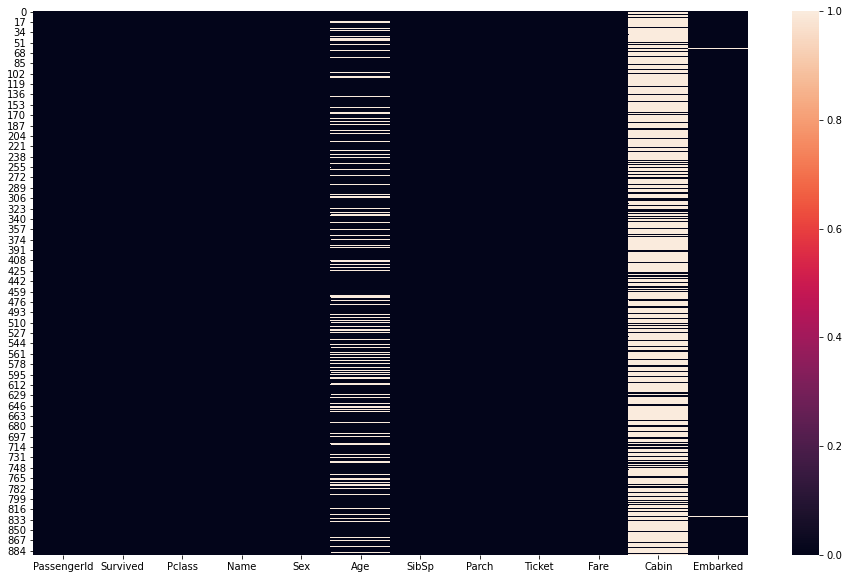

In [8]:
plt.figure(figsize=[16,10])
sns.heatmap(df.isnull())

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Null Value Fixing:
As decide earlier lets remove the Cabin column as almost more than 78% of data is null.no need to pass in model.

cabin column total rows:
891 rows,
687 null values,
(687/891)*100= ~77.1% of data is null.


In [10]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
df["Embarked"].mode()

0    S
dtype: object

In [12]:
df.Embarked=df.Embarked.fillna(df['Embarked'].mode()[0])

In [13]:
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Observation:
Null values have been replaced with mode and hence no null values.

In [15]:
df["Age"].median()

28.0

In [16]:
df.Age.fillna(df.Age.median(), inplace = True)

In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Observation:
Now Age column is cleared from null values.

In [18]:
df["Age"].value_counts()

28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
55.50      1
70.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

# Dropping The columns:

In [19]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
column_drop=["PassengerId","Name","Ticket","Cabin"]
df_new=df

In [21]:
df_new.drop(column_drop,axis=1,inplace=True)

In [22]:
df_new.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# EDA

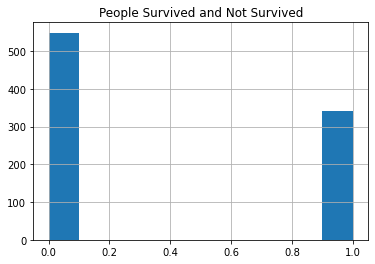

In [23]:
df["Survived"].hist(grid=True)
plt.title("People Survived and Not Survived")
plt.show()

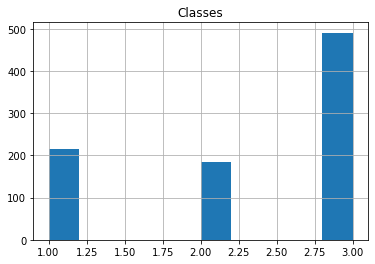

In [24]:
df["Pclass"].hist(grid=True)
plt.title("Classes")
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

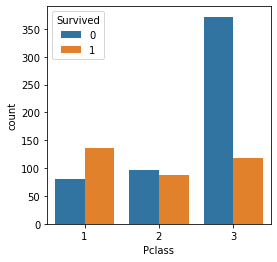

In [25]:
plt.subplots(figsize=(4,4))
sns.countplot(x='Pclass',data=df_new,hue='Survived')

<AxesSubplot:xlabel='Sex', ylabel='count'>

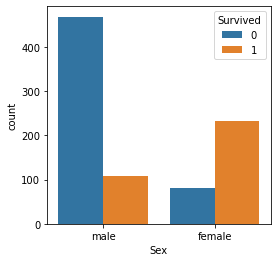

In [26]:
plt.subplots(figsize=(4,4))
sns.countplot(x='Sex',data=df_new,hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

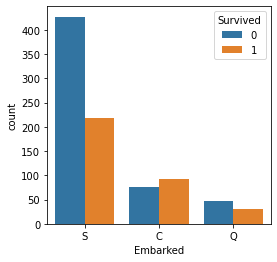

In [27]:
plt.subplots(figsize=(4,4))
sns.countplot(x='Embarked',data=df_new,hue='Survived')

Observation:
S=Southampton
C=Cherbourg
Q=Qeenstown
70% of people boarded from 'S' location


<AxesSubplot:xlabel='SibSp', ylabel='count'>

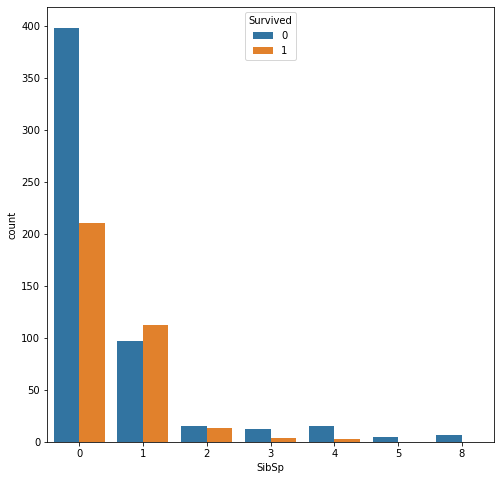

In [28]:
plt.subplots(figsize=(8,8))
sns.countplot(x='SibSp',data=df_new,hue='Survived')

<AxesSubplot:xlabel='Parch', ylabel='count'>

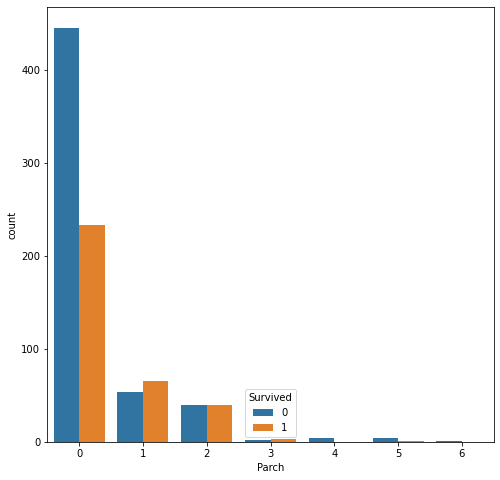

In [29]:
plt.subplots(figsize=(8,8))
sns.countplot(x='Parch',data=df_new,hue='Survived')

## Bivariate Analysis

<AxesSubplot:title={'center':'Comparision between Class and Fare'}, xlabel='Pclass', ylabel='Fare'>

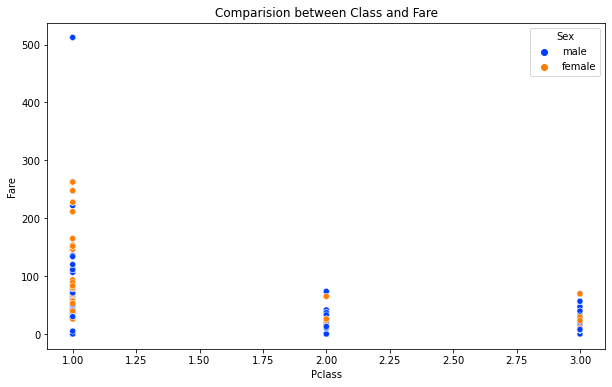

In [30]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Class and Fare')
sns.scatterplot(df_new['Pclass'],df_new['Fare'],hue=df['Sex'],palette='bright')

# Multivariate Analysis

In [31]:
#Example of Multivaiate analysis
corr_mat=df_new.corr()
corr_mat

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


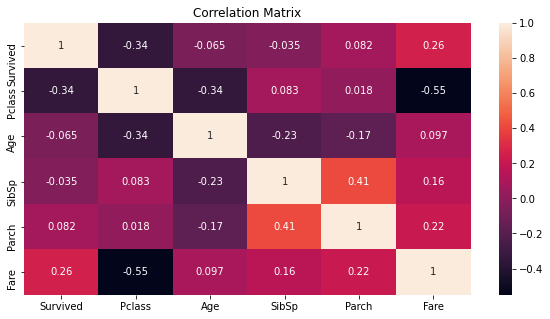

In [32]:
plt.figure(figsize=[10,5])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

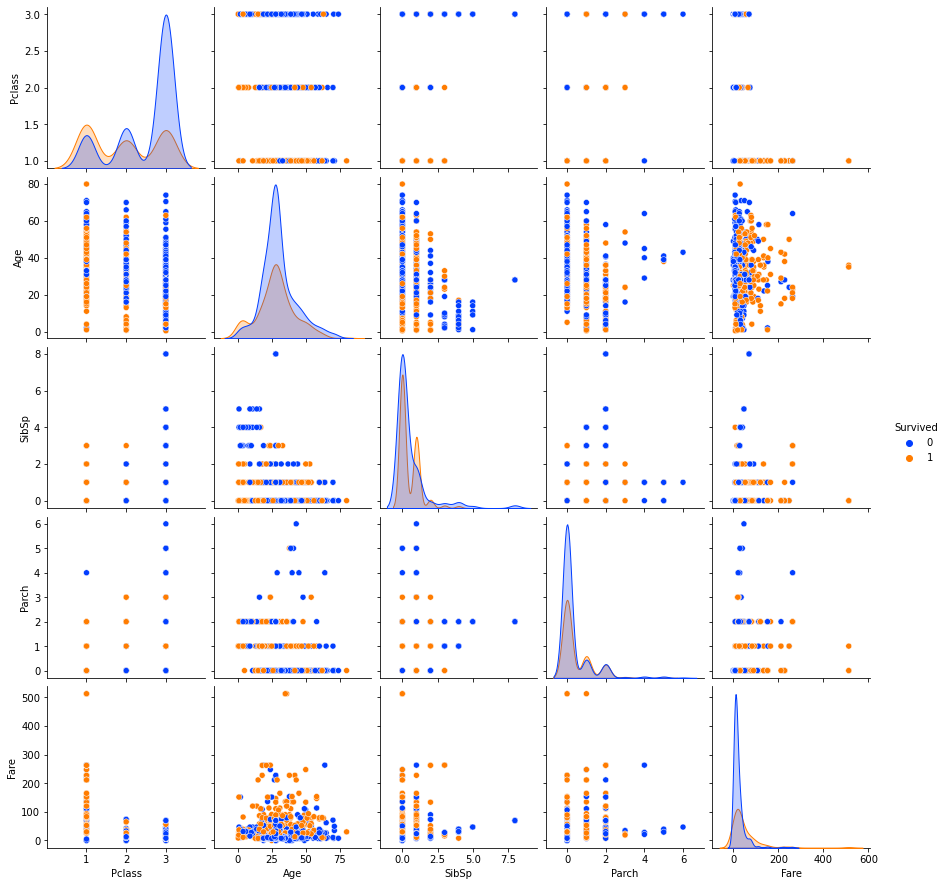

In [33]:
sns.pairplot(df,hue='Survived',palette='bright')

In [34]:
collist=df.columns.values
collist

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'], dtype=object)

# Label Encoding

In [35]:
LE=LabelEncoder()
df_new["Sex"] = LE.fit_transform(df_new["Sex"])

In [36]:
df_new["Embarked"] = LE.fit_transform(df_new["Embarked"])

In [37]:
df_new.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


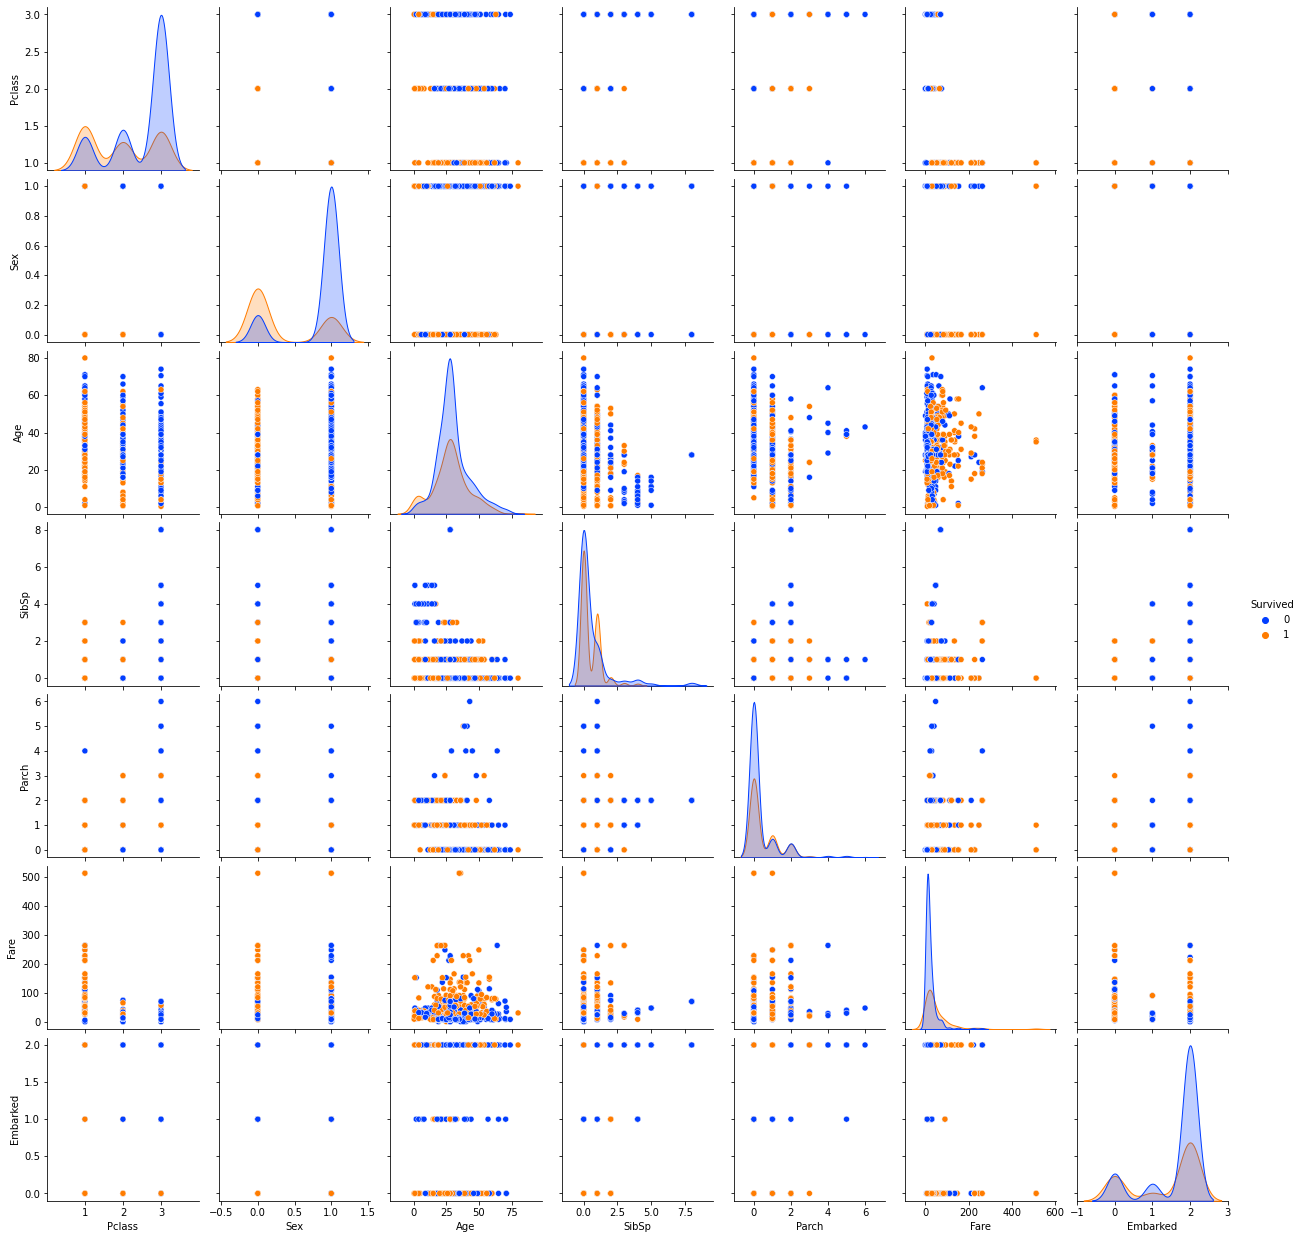

In [38]:
sns.pairplot(df_new,hue='Survived',palette='bright')

### Lets check outliers with box plot

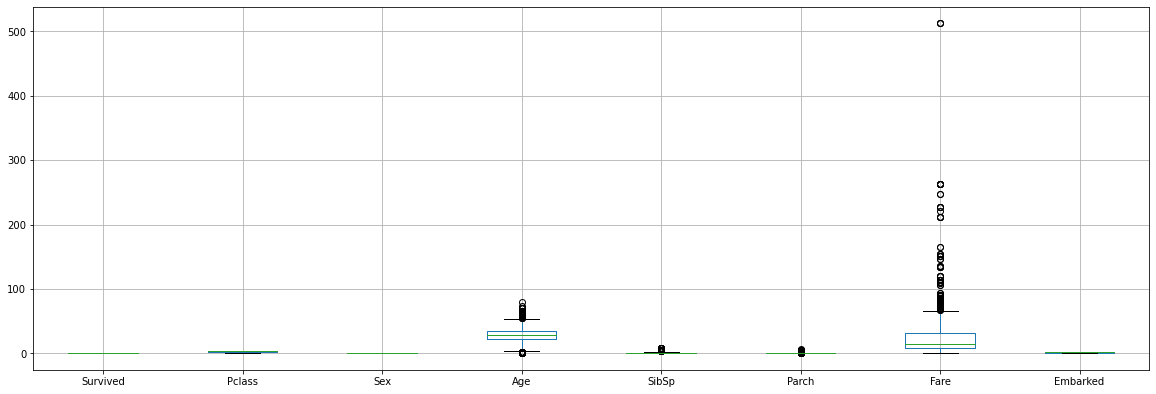

In [39]:
df_new.iloc[:,0:10].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

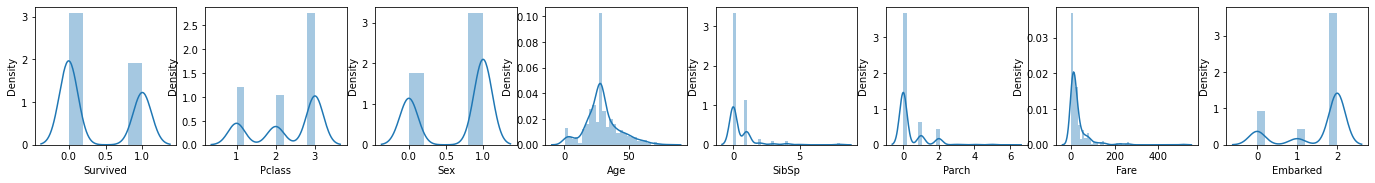

In [40]:
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(10,10,i+1)
    sns.distplot(df[collist[i]])

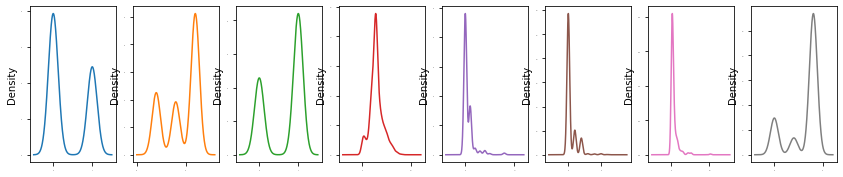

In [41]:
df.plot(kind='density', subplots=True, layout=(6,11), sharex=False, legend=False,fontsize=1,figsize=(20,20))
plt.show()

# Model Building

In [42]:
x=df_new.drop("Survived",axis=1)
y=df_new["Survived"]

## Random state Selection

In [43]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is  "  ,maxAccu , "  at random_state:", maxRS)

Best accuracy is   0.8542372881355932   at random_state: 150


### Train test split

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=150)

#### Lets check with different models for best Accuracy model

In [45]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
preddt=kn.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.711864406779661
[[143  33]
 [ 52  67]]
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       176
           1       0.67      0.56      0.61       119

    accuracy                           0.71       295
   macro avg       0.70      0.69      0.69       295
weighted avg       0.71      0.71      0.71       295



In [46]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8305084745762712
[[152  24]
 [ 26  93]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       176
           1       0.79      0.78      0.79       119

    accuracy                           0.83       295
   macro avg       0.82      0.82      0.82       295
weighted avg       0.83      0.83      0.83       295



In [47]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.847457627118644
[[158  18]
 [ 27  92]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       176
           1       0.84      0.77      0.80       119

    accuracy                           0.85       295
   macro avg       0.85      0.84      0.84       295
weighted avg       0.85      0.85      0.85       295



In [48]:
svc=SVC()
svc.fit(x_train,y_train)
predsv=svc.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.6813559322033899
[[166  10]
 [ 84  35]]
              precision    recall  f1-score   support

           0       0.66      0.94      0.78       176
           1       0.78      0.29      0.43       119

    accuracy                           0.68       295
   macro avg       0.72      0.62      0.60       295
weighted avg       0.71      0.68      0.64       295



In [49]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8338983050847457
[[151  25]
 [ 24  95]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       176
           1       0.79      0.80      0.79       119

    accuracy                           0.83       295
   macro avg       0.83      0.83      0.83       295
weighted avg       0.83      0.83      0.83       295



There may be some cases of Overfitting or underfitting with Accuracy score.So lets try model accuracy with Crossvalidation.

# Cross Validation

In [50]:
scr=cross_val_score(kn,x,y,cv=5)
print("Cross Validation Score of KNeighborsClassifier Model is : ", scr.mean())

Cross Validation Score of KNeighborsClassifier Model is :  0.6947649237336011


In [51]:
scr=cross_val_score(dt,x,y,cv=5)
print("Cross Validation Score of DecisionTree Model is : ", scr.mean())

Cross Validation Score of DecisionTree Model is :  0.7789153223275375


In [52]:
scr=cross_val_score(rf,x,y,cv=5)
print("Cross Validation Score of RandomForest Model is : ", scr.mean())

Cross Validation Score of RandomForest Model is :  0.8114807607808675


In [53]:
scr=cross_val_score(svc,x,y,cv=5)
print("Cross Validation Score of Support Vector Model is : ", scr.mean())

Cross Validation Score of Support Vector Model is :  0.674615529470843


In [54]:
scr=cross_val_score(gnb,x,y,cv=5)
print("Cross Validation Score of GussianNB Model is : ", scr.mean())

Cross Validation Score of GussianNB Model is :  0.7901512773837174


# Hyper Parameter Tuning

In [55]:
parameters={'max_depth': np.arange(2,10),
             'criterion': ['gini','entropy']}

In [56]:
gcv=GridSearchCV(RandomForestClassifier(), parameters,cv=5) #Tuning RandomForestClassifier

In [57]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [58]:
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [59]:
mod=RandomForestClassifier(criterion='gini',max_depth=7,random_state=150)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

85.42372881355932


### Earlier accuracy in cross validation was 81% . Now after Hyper tuning it is increased to 85.4%

# Hence we have the best model accuracy with RandomForestClassifier model.


## Saving the model

In [60]:
import joblib
joblib.dump(mod,"Titanic model.pkl")

['Titanic model.pkl']

## Loading the saved model

In [61]:
model=joblib.load("Titanic model.pkl")

In [62]:
prediction=model.predict(x_test)

In [63]:
print(accuracy_score(y_test,prediction)*100)

85.42372881355932


In [64]:
prediction=pd.DataFrame(prediction) #Converting into Dataframe

In [65]:
prediction.to_csv('Results.csv') #Saving the predictions

In [66]:
prediction

,0
0,0
1,0
2,1
3,1
4,0
...,...
290,0
291,0
292,0
293,0


Observation: 
Saved and  Loaded the model to check if its working fine and predictions are working. 
Conclusion:
All were working fine with RandomForestClassifier model as best.